# DT2470 Lab 01: Teh Signal Processings

by Bob L. T. Sturm

In this first lab you will practice some fundamental concepts of signal processing. You will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc. You will also learn to extract low-level features from audio and music signals. In the next lab, you will use these features for some machine learning madness.

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python. Here's some helpful links as well:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [Scipy API](https://docs.scipy.org/doc/scipy/reference/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.

# Part 1: Basics

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Download it, load it using pydub (see [pydub.AudioSegment](https://github.com/jiaaro/pydub/blob/master/API.markdown)), and plot a portion of the waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

> Below is the first 10 seconds of my selected audio waveform. Yours should appear nearly as beautiful.
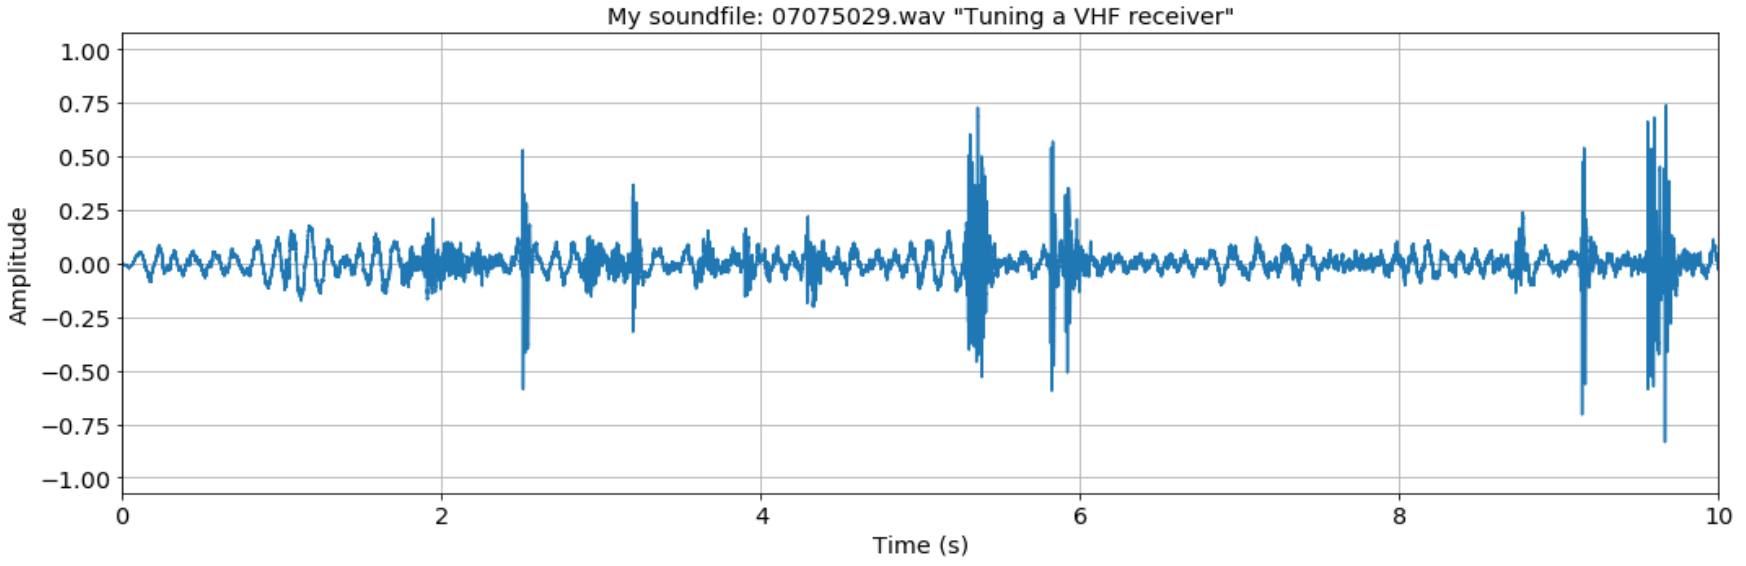

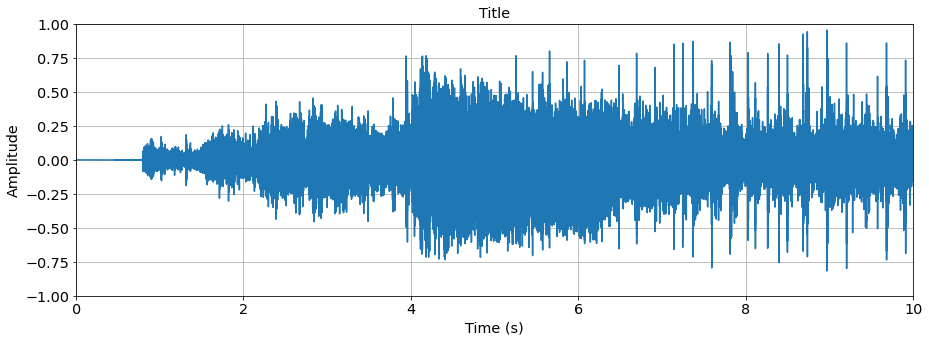

In [2]:
# Now we plot the entire audio file
import pydub
import matplotlib.pyplot as plt
import numpy as np
import math



# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# add your code below

song = pydub.AudioSegment.from_file("07028103guy.wav",format="wav");
Fs=samples_rate = song.frame_rate;
duration_sec = song.duration_seconds;
frame_width = song.frame_width;
song_array = np.array(song.get_array_of_samples());
#Normalize the song array

samples = song.get_array_of_samples();


samples_norm = []
for i in samples:
    normalized_sample = (i / 2**16) * 2
    samples_norm.append(normalized_sample)

    
if song.channels > 1:
    channel_l = samples_norm[::2]
    channel_r = samples_norm[1::2]
    samples = channel_l    

    
time = np.linspace(0, len(samples)/Fs, num=len(samples))


def plot_figure(title, x_axis, y_axis, x, y):
    plt.figure();
    plt.title(title);
    plt.xlabel(x_axis);
    plt.ylabel(y_axis);
    plt.plot(x,y);
    plt.xlim([0,10])
    plt.ylim([-1,1]);
    plt.grid();
    plt.show();
    
plot_figure("Title", "Time (s)", "Amplitude", time, samples)

    


2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

>Below is what mine looks like. We can see the sound appears quite different at both times. At  about 2500 ms we see a sudden rise that decays and oscillates. At about 26 s we see a noisy waveform that has a small amplitude. 

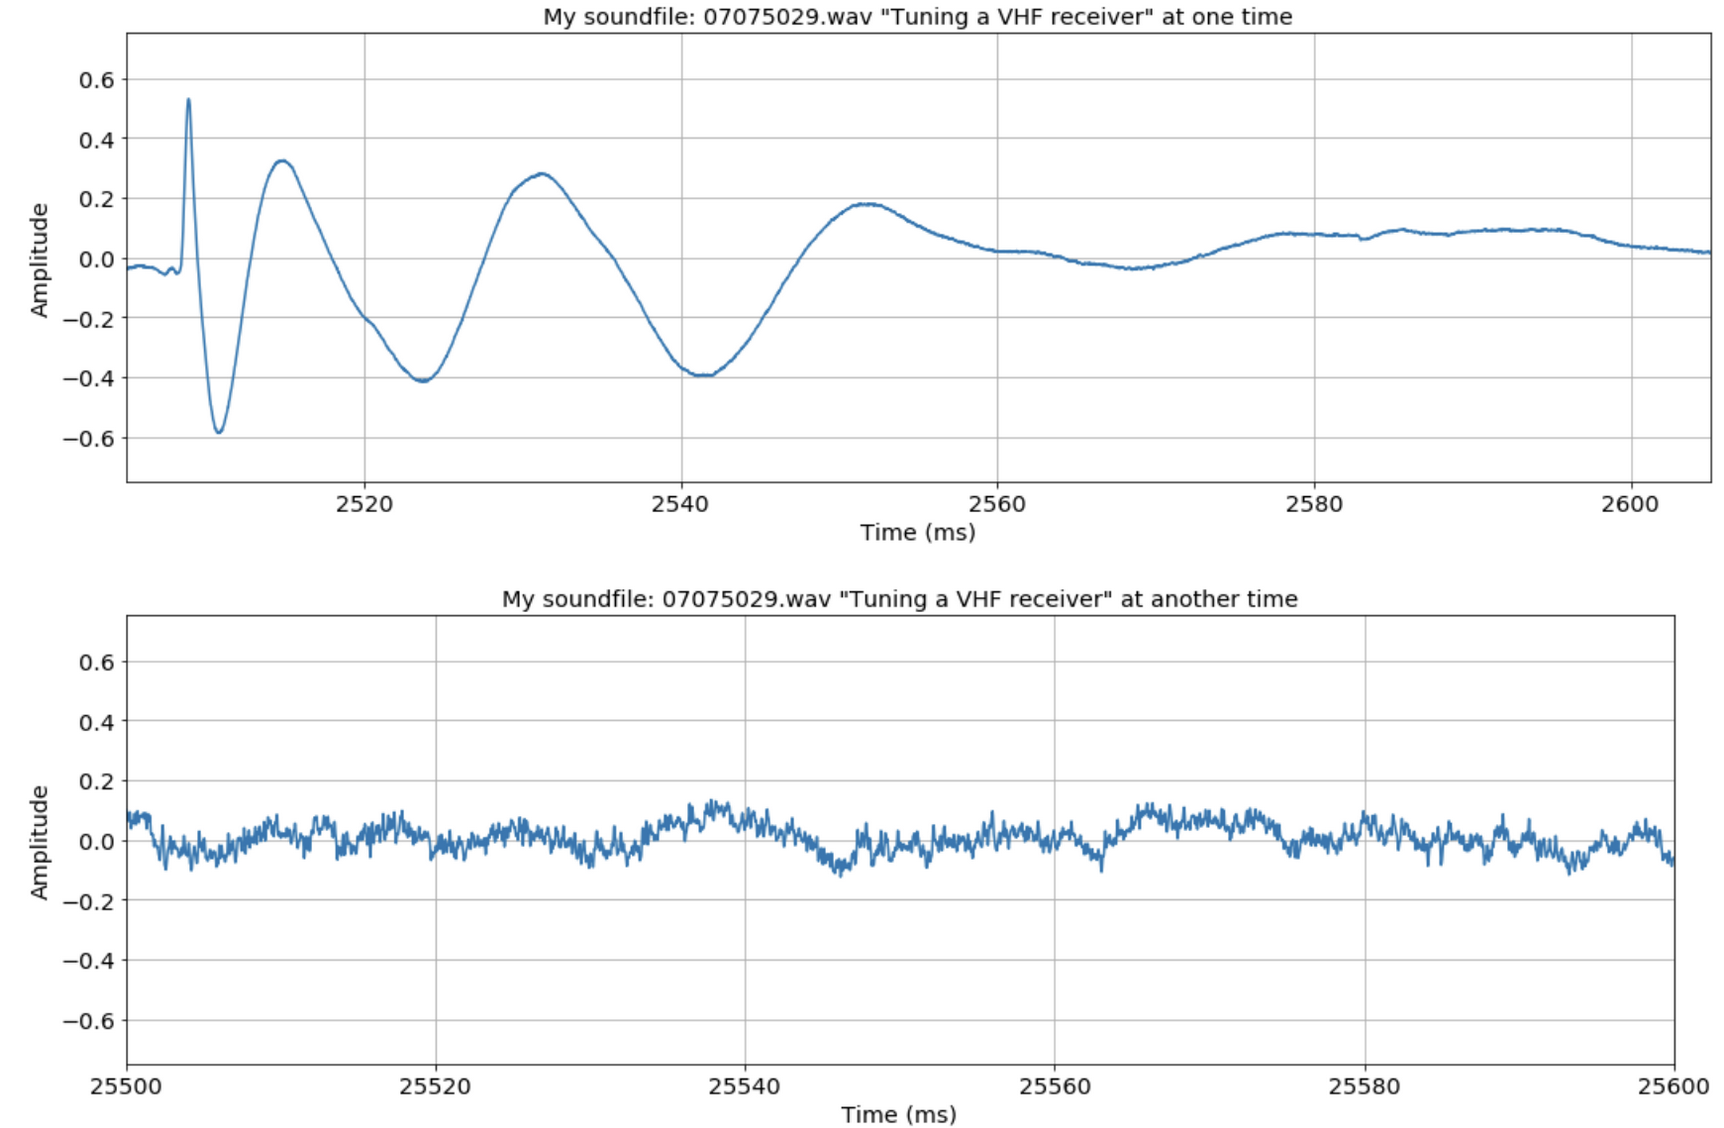

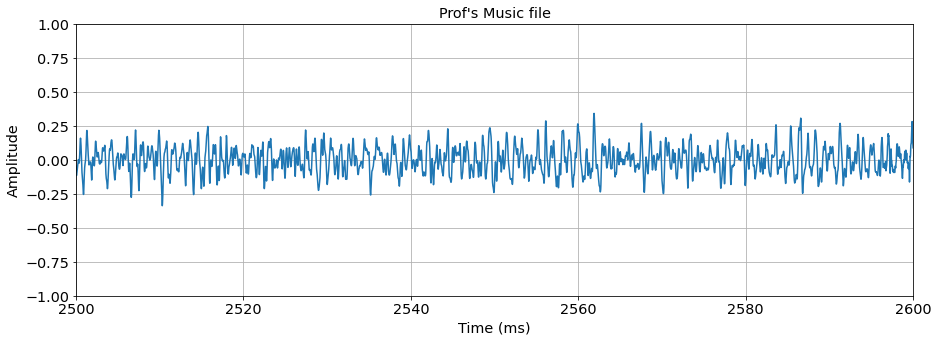

653032


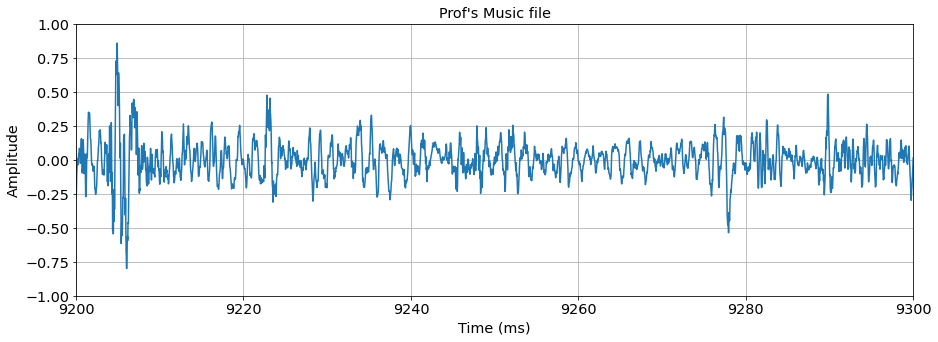

In [4]:
# add your code below
import math

def plot_zoom(title, x_axis, y_axis, x, y):
    plt.figure();
    plt.title(title);
    plt.xlabel(x_axis);
    plt.ylabel(y_axis);
    plt.plot(x*1000,y);
    plt.xlim([2.5*1000,2.6*1000]);
    plt.ylim([-1,1]);
    plt.grid();
    plt.show();


plot_zoom("Prof's Music file", "Time (ms)", "Amplitude", time, samples)
print(len(samples))


def plot_zoom2(title, x_axis, y_axis, x, y):
    plt.figure();
    plt.title(title);
    plt.xlabel(x_axis);
    plt.ylabel(y_axis);
    plt.plot(x*1000,y);
    plt.xlim([9.2*1000,9.3*1000]);
    plt.ylim([-1,1]);
    plt.grid();
    plt.show();

plot_zoom2("Prof's Music file", "Time (ms)", "Amplitude", time, samples)


3. For each of the two segments you looked at above, window them with a rectangular window and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). Then do the same but using the Hann window.

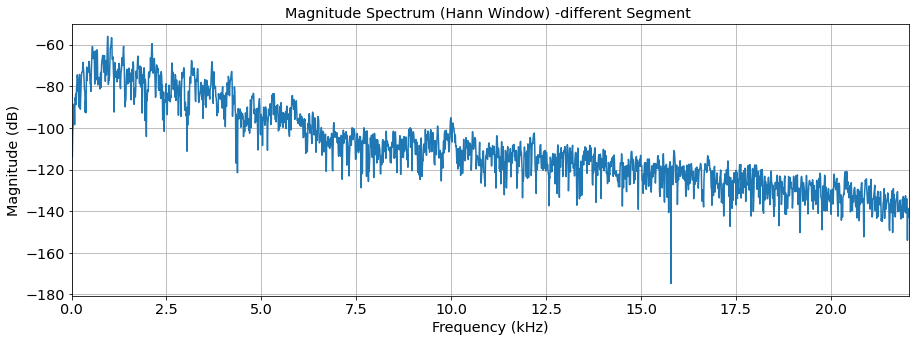

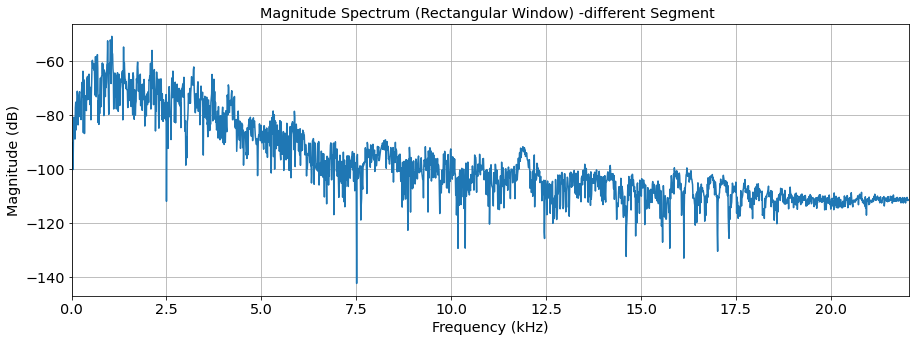

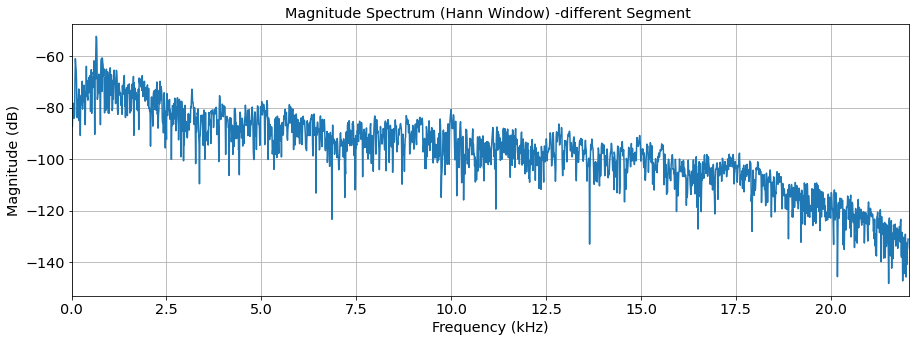

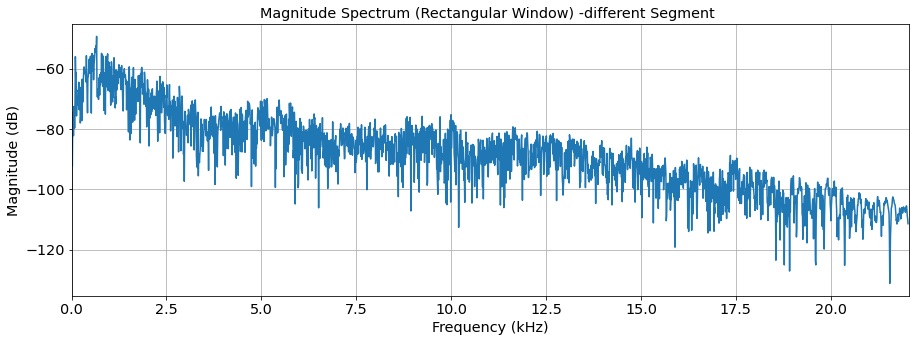

In [5]:
# add your code below
from scipy import signal, fft
from scipy.signal import hann

def do_and_plot_fft(samples, Fs, window_type):
    #Define time axis
    time = len(samples);
    ref = (2**16)/2 #reference value
    
    
    #Apply the specified window to the samples
    if window_type =="rectangular":
        window = np.ones(len(samples));
    else:
        window = hann(len(samples));
        
    windowed_samples = samples*window
    #compute FFT of windowed samples
    fft_samples = fft.fft(windowed_samples)
    
    
    fft_samples = fft_samples[range(time//2)]
    #compute Frequency in kHz
    freq = np.fft.fftfreq(len(windowed_samples), 1.0 / Fs) / 1000
    freq = freq[range(time//2)]

    #dB scale
    magnitude_spectrum = 20 * np.log10(np.abs(fft_samples)/ref)
    
    
    
    plt.figure()
    plt.plot(freq,magnitude_spectrum)
    plt.title(f'Magnitude Spectrum ({window_type.capitalize()} Window) -different Segment ')
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Magnitude (dB)')
    plt.xlim(0, Fs / 2 / 1000)
    plt.grid(True)
    #plt.legend()
    plt.show()

    
    
    


#2.5-2.6s    
do_and_plot_fft(samples[math.ceil(2.5*Fs):math.ceil(2.6*Fs)],Fs, window_type = 'hann')
do_and_plot_fft(samples[math.ceil(2.5*Fs):math.ceil(2.6*Fs)],Fs,window_type = 'rectangular')




#25.5-25.6s
do_and_plot_fft(samples[math.ceil(9.2*Fs):math.ceil(9.3*Fs)],Fs, window_type = 'hann')
do_and_plot_fft(samples[math.ceil(9.2*Fs):math.ceil(9.3*Fs)],Fs,window_type = 'rectangular')

4. For the first 10 seconds of your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). See [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) for help.

<ipython-input-92-f2ad58ffa345>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f/1000, samples_stft_dB, cmap='viridis')


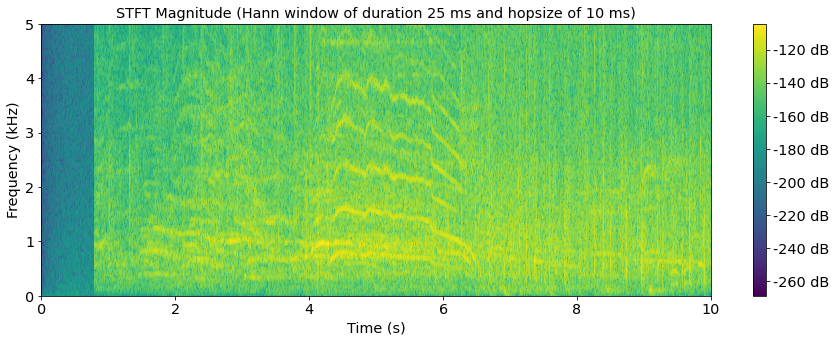

In [92]:
# add your code below

import librosa

#first 10 seconds
sample_1 = samples[math.ceil(0*Fs):math.ceil(10*Fs)]
Time_1 = np.linspace(0, len(sample_1)/Fs, num = len(sample_1))




# method_2

ref = (2**16)/2 #reference value
f, t, samples_stft = signal.stft(sample_1, 
                                 Fs, window='hann',
                                 nfft = 8192, 
                                 nperseg=0.025*Fs, 
                                 noverlap=(0.025-0.010)*Fs) # stft computing
samples_stft_dB = 20 * np.log10(np.abs(samples_stft)/ref)
plt.pcolormesh(t, f/1000, samples_stft_dB, cmap='viridis')
plt.title('STFT Magnitude (Hann window of duration 25 ms and hopsize of 10 ms)')
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (s)')
plt.colorbar(format='%+0.0f dB')
plt.ylim([0,5])
plt.show()





5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.


Long time windows provide better frequency resolution, allowing for the accurate separation of closely spaced frequency components in the signal. 

Short time windows provide better time resolution.

        

6. For the first 10 seconds of your audio file, use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

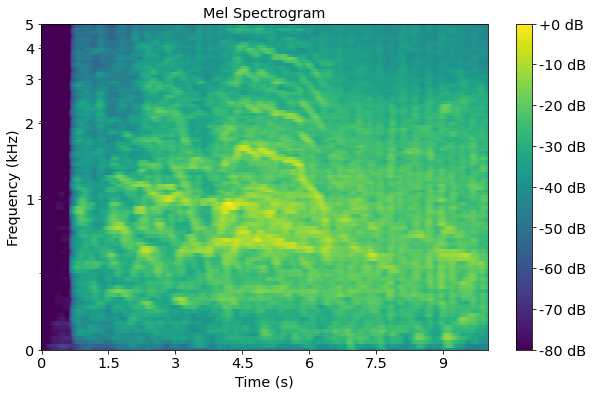

In [7]:
import librosa
import librosa.display
# add your code below

#Load the audio file
audio_file = "07028103guy.wav"
y, sr = librosa.load(audio_file, duration=10)  # first 10 seconds


hop_length = int(sr * 0.01)  # 10 ms hop size
n_mels = 128
n_fft = 8192

#Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, window='hann')

# dB scale with reference to the max power observed
S_dB = librosa.power_to_db(S, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, cmap='viridis', y_axis='mel', x_axis='time')
plt.colorbar(format='%+0.0f dB')
plt.yticks([0,1000,2000,3000,4000,5000],labels = ['0','1','2','3','4','5'])
plt.ylim(0, 5000)  # Limit y-axis to 0-5 kHz
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.show()

# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [8]:
# add your code below
import numpy as np
def zero_crossing_count(audio_samples, frame_size, hop_size):
    # empty list to store the zero crossing counts for each frame
    zero_crossing_counts = []

    for i in range(0, len(audio_samples) - frame_size + 1, hop_size):
        frame = audio_samples[i:i+frame_size]
        signs = np.sign(frame)
        differences = signs[0:(len(signs)-1)] - signs[1:len(signs)]
        zero_crossings = np.count_nonzero(differences != 0) # count number of zero crossings
        zero_crossing_counts.append(zero_crossings)

    return zero_crossing_counts

2. Using your function, compute zero crossings of 46 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of zero crossings you extracted.

Text(0, 0.5, 'zero-crossings')

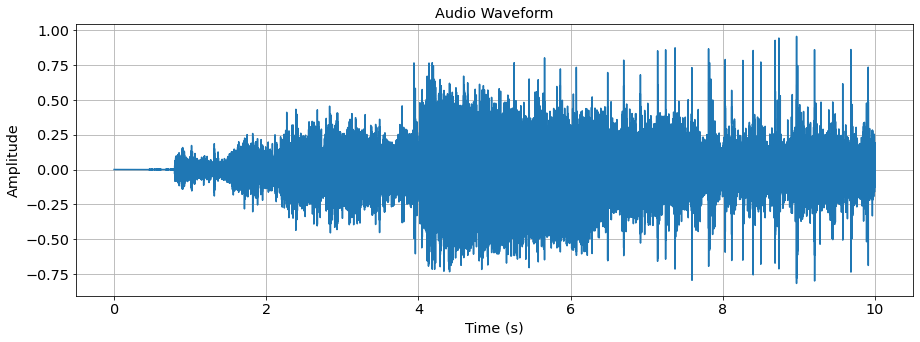

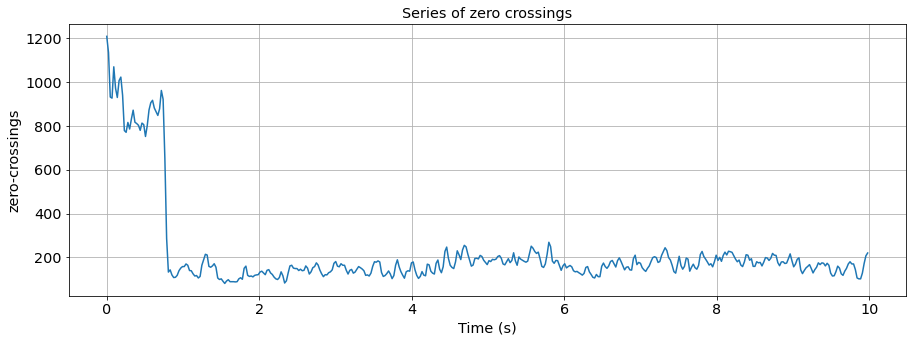

In [38]:
# add your code below
import numpy as np
import matplotlib.pyplot as plt



#frame size and hop size in samples
audio_samples = samples
audio_samples = samples[math.ceil(0*Fs):math.ceil(10*Fs)]
Fs = sample_rate = 44100
frame_size_ms = 46  # 46 ms


count1 = zero_crossing_count(audio_samples,frame_size_ms*Fs//1000, frame_size_ms*Fs//2000)

# Calculate zero crossings
#zero_crossings = zero_crossing_count(audio_samples, frame_size_samples, hop_size_samples)

# Plot the first 10 seconds of the time domain waveform
duration = 10  # seconds
num_samples_to_plot = int(duration * sample_rate)
time = np.arange(0, num_samples_to_plot) / sample_rate
plt.figure()
plt.plot()
plt.plot(time, audio_samples[:num_samples_to_plot])
plt.grid()
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')



time4 = np.arange(len(count1))/len(count1)*10
plt.figure()
plt.plot(time4,count1)
plt.grid()
plt.title('Series of zero crossings')
plt.xlabel('Time (s)')
plt.ylabel('zero-crossings')

3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [90]:
# add your code below
#import numpy as np
#import librosa

def spectral_centroid(audio_file_samples, frame_size, hop_size, sampling_rate):
    # Calculate the number of frames
    num_frames = 1 + (len(audio_file_samples) - frame_size) // hop_size
    
    # Initialize an array to store the spectral centroids
    spectral_centroids = np.zeros(num_frames)
    sampling_rate = Fs
    # Compute the spectral centroid for each frame
    for i in range(num_frames):
        # Extract the current frame
        frame = audio_file_samples[i * hop_size:i * hop_size + frame_size]
        
        # Compute the DFT of the frame
        frame_dft = np.fft.fft(frame)
        
        # Calculate the magnitude of the DFT
        magnitude = np.abs(frame_dft)
        
        # Create the frequency axis
        frequency_axis = np.fft.fftfreq(frame_size, 1.0 / sampling_rate)
        
        # Calculate the spectral centroid using the formula
        num = np.sum(frequency_axis[:frame_size//2+1] * magnitude[:frame_size//2+1])
        den = np.sum(magnitude[:frame_size//2+1])
        
        if den != 0:
            spectral_centroids[i] = num / den
        else:
            spectral_centroids[i] = 0.0  # avoid division by zero
        
    return spectral_centroids
#audio_file = "07028103guy.wav"
#frame_size = 1024  # Adjust as needed
#hop_size = 512    # Adjust as needed
#sampling_rate = 44100
#audio_samples, _ = librosa.load(audio_file, sr=sampling_rate)
#centroids = compute_spectral_centr(audio_samples, frame_size_ms, hop_size, Fs)

4. Using your function, compute spectral centroid features for contiguous 46 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of spectral centroids you extracted.

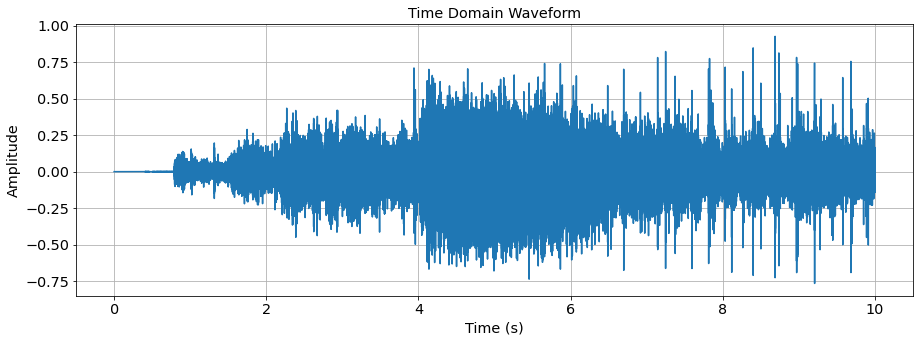

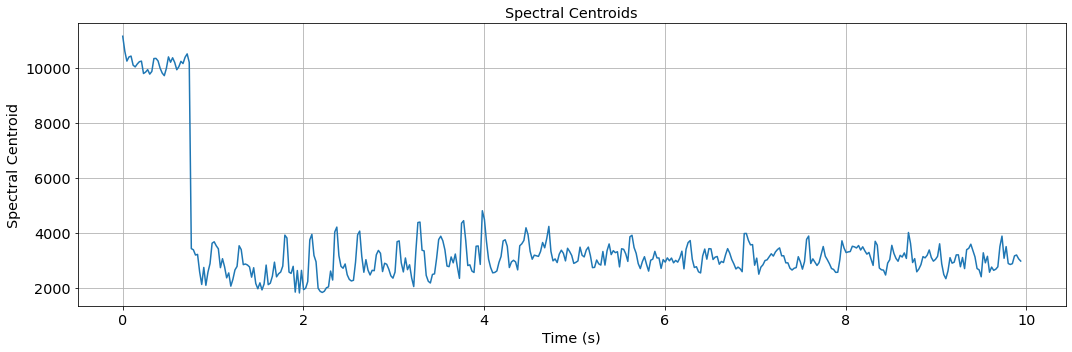

In [91]:
# add your code below
# add your code below
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Function to compute spectral centroid
#def spectral_centroid(audio_samples, frame_size, hop_size, sampling_rate):
    # ... (Use the function as defined in the previous response)

# Load the audio file
audio_file = "07028103guy.wav"
sampling_rate = 44100  # Adjust as needed
audio_samples, _ = librosa.load(audio_file, sr=sampling_rate)
audio_samples = audio_samples[math.ceil(0*Fs):math.ceil(10*Fs)]

# Frame parameters
frame_duration = 0.046  # 46 ms
hop_duration = frame_duration / 2  # 50% hop

# Convert durations to samples
frame_size = int(frame_duration * sampling_rate)
hop_size = int(hop_duration * sampling_rate)

# Compute spectral centroids
spectral_centroids = spectral_centroid(audio_samples, frame_size, hop_size, sampling_rate)

# Create a time axis for plotting
time_axis = np.arange(0, len(audio_samples)) / sampling_rate

# Plot the first 10 seconds of the time domain waveform
plt.figure(10)
plt.plot(time_axis[:int(10 * sampling_rate)], audio_samples[:int(10 * sampling_rate)])
plt.title('Time Domain Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# Plot the spectral centroids
plt.figure(11)
frame_times = np.arange(0, len(spectral_centroids)) * hop_duration
plt.plot(frame_times[:int(10 / hop_duration)], spectral_centroids[:int(10 / hop_duration)])
plt.title('Spectral Centroids')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Centroid')
plt.grid()
plt.tight_layout()
plt.show()


5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds.

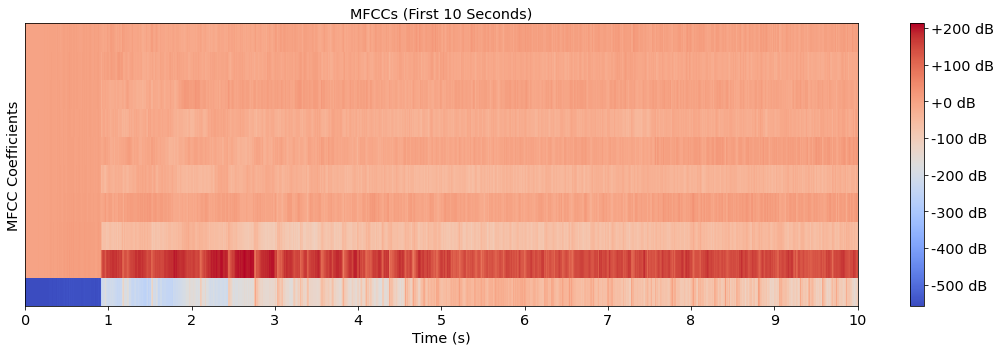

In [31]:
# add your code below
import librosa.display
import matplotlib.pyplot as plt

audio_samples, _ = librosa.load(audio_file, sr=Fs)

# window and hop sizes in samples
win_size = int(0.025 * sampling_rate)  # 25 ms window
hop_size = int(0.010 * sampling_rate)  # 10 ms hop

# MFCCs
mfccs = librosa.feature.mfcc(
    y=audio_samples,
    sr=sampling_rate,
    n_fft=8192,
    hop_length=hop_size,
    win_length=win_size,
    n_mfcc=10  #first 10 MFCCs
)

time_axis = librosa.times_like(mfccs)

# Plot MFCCs for first 10 seconds
plt.figure()
librosa.display.specshow(mfccs[:, :int(10 / 0.01)], x_axis='time', sr=Fs)
plt.colorbar(format="%+0.0f dB")
plt.xlim([0,10])
plt.title("MFCCs (First 10 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.tight_layout()
plt.show()
